In [1]:
import os
from shutil import rmtree

import xarray as xr

from src.test_problem import setup_solver
from src import nk_driver

from utils import plot_all_vars

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_iage_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
common_args = ["--workdir", wdir, "--tracer_module_names", "iage"]

In [4]:
setup_solver.main(setup_solver.parse_args(common_args + ["--fp_cnt", "1"]))

2021-02-15 12:32:24,133:73665:setup_solver.py:main:args.cfg_fname="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg"
2021-02-15 12:32:24,137:73665:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_iage_wdir/nk_driver.sh
2021-02-15 12:32:24,138:73665:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_iage_wdir/depth_axis_test.nc"
2021-02-15 12:32:24,153:73665:setup_solver.py:main:fp_iter=0
2021-02-15 12:32:26,726:73665:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_iage_wdir/gen_init_iterate/init_iterate.nc"


<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    iage          (depth) float64 ...
Attributes:
    history:  2021-02-15 12:32:24: created by src.test_problem.model_state.Mo...


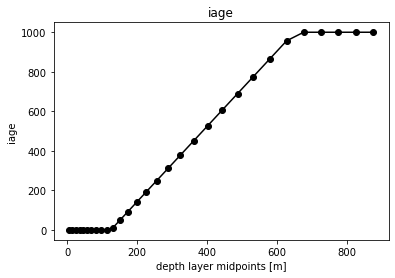

In [5]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:          (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time             (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth            (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges      (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds     (depth, nbnds) float64 ...
    depth_delta      (depth) float64 ...
    bldepth          (time) float64 ...
    mixing_coeff     (time, depth_edges) float64 ...
    iage             (time, depth) float64 ...
    iage_time_mean   (depth) float64 ...
    iage_time_anom   (time, depth) float64 ...
    iage_time_std    (depth) float64 ...
    iage_time_delta  (depth) float64 ...
    iage_depth_int   (time) float64 ...
Attributes:
    history:  2021-02-15 12:32:24: created by src.test_problem.model_state._g...


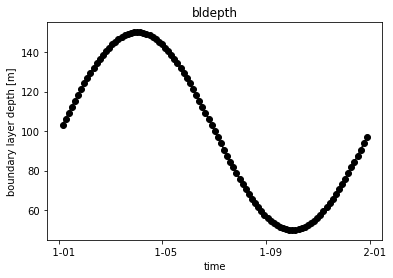

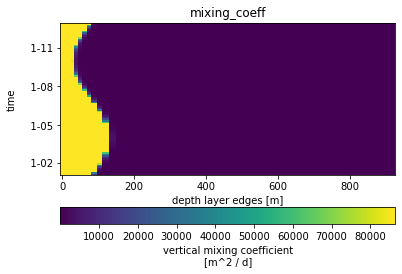

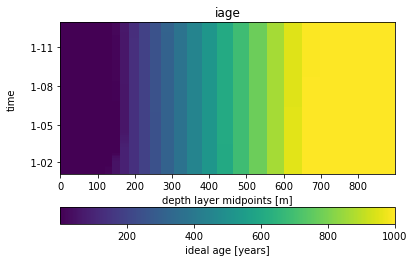

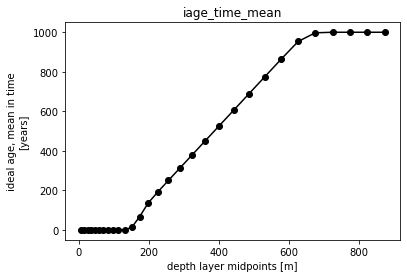

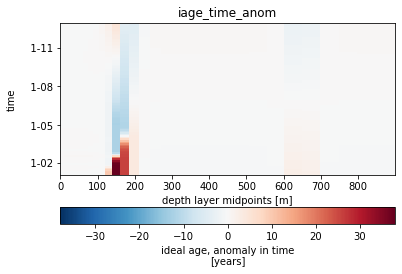

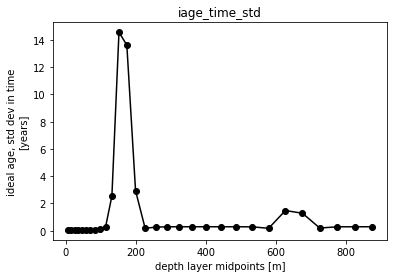

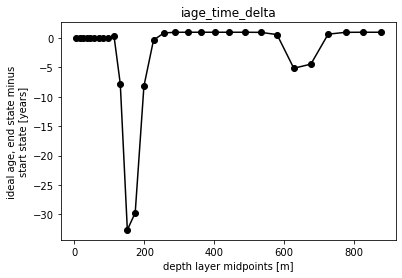

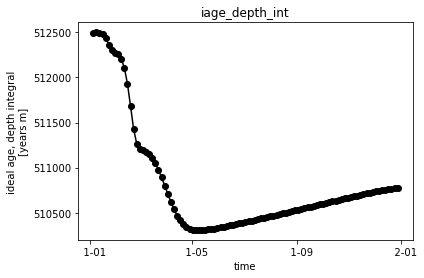

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:       (depth: 30, depth_edges: 31, nbnds: 2)
Coordinates:
  * depth         (depth) float64 5.0 15.01 25.07 35.32 ... 775.1 825.0 875.0
  * depth_edges   (depth_edges) float64 0.0 10.0 20.02 ... 800.0 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds  (depth, nbnds) float64 ...
    depth_delta   (depth) float64 ...
    iage          (depth) float64 ...
Attributes:
    history:  2021-02-15 12:32:26: created by src.test_problem.model_state.Mo...


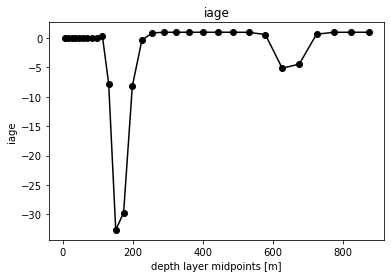

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    print(ds)
    plot_all_vars(ds)

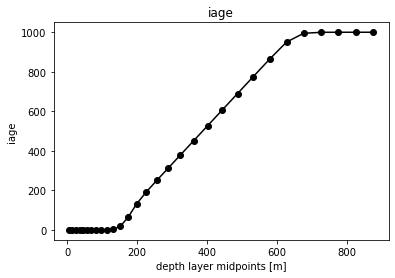

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [9]:
nk_driver.main(nk_driver.parse_args(common_args + ["--persist"]))

2021-02-15 12:32:28,175:73665:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2021-02-15 12:32:28,184:73665:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2021-02-15 12:32:28,185:73665:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2021-02-15 12:32:28,185:73665:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2021-02-15 12:32:28,186:73665:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_iage_wdir/depth_axis_test.nc for grid_weight
2021-02-15 12:32:28,188:73665:nk_driver.py:main:using class ModelState from src.test_problem.model_state for model state
2021-02-15 12:32:28,189:73665:solver_state.py:__init__:"Newton" iteration now 0
2021-02-15 12:32:30,768:73665:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[iage]=5.675355e+02
2021-02-15 1

<xarray.Dataset>
Dimensions:              (depth: 30, iteration: 3, region: 1)
Coordinates:
  * iteration            (iteration) int32 0 1 2
  * depth                (depth) float64 5.0 15.01 25.07 ... 775.1 825.0 875.0
Dimensions without coordinates: region
Data variables:
    iterate_mean_iage    (iteration, region) float64 ...
    iterate_norm_iage    (iteration, region) float64 ...
    fcn_mean_iage        (iteration, region) float64 ...
    fcn_norm_iage        (iteration, region) float64 ...
    increment_mean_iage  (iteration, region) float64 ...
    increment_norm_iage  (iteration, region) float64 ...
    Armijo_factor_iage   (iteration, region) float64 ...
    iage                 (iteration, region, depth) float64 ...
Attributes:
    history:  2021-02-15 12:32:28: created by src.stats_file.StatsFile._creat...


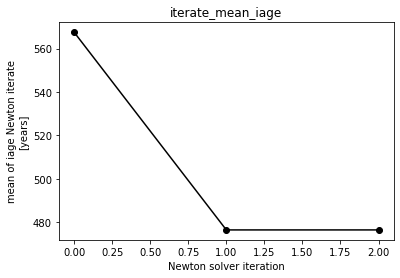

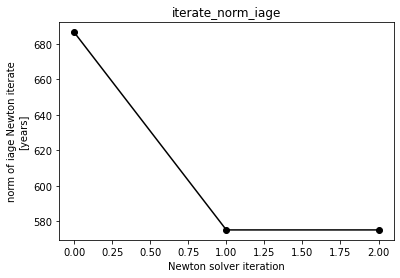

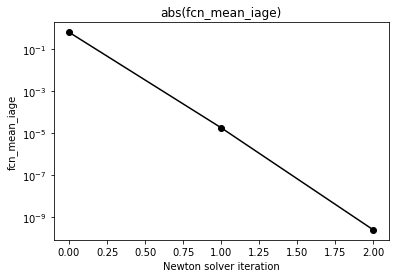

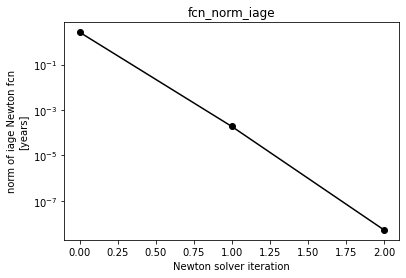

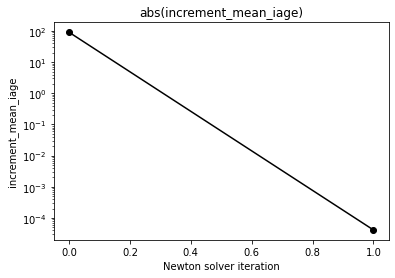

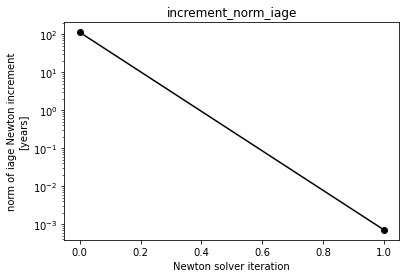

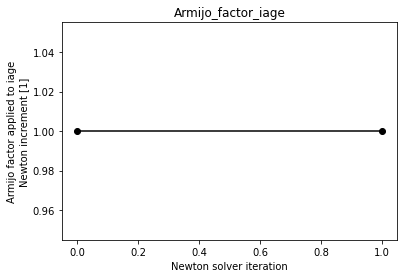

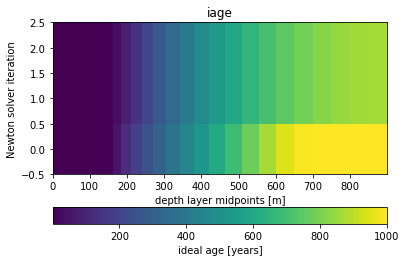

In [10]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    print(ds)
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [11]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

02


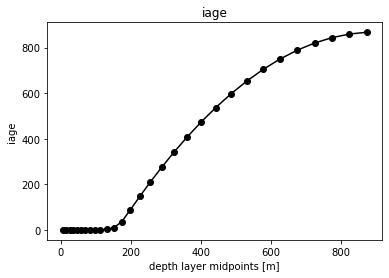

In [12]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

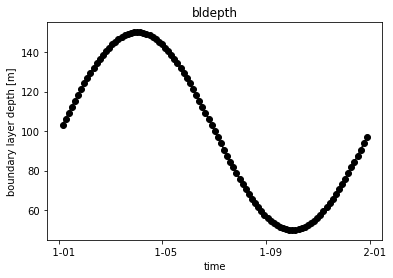

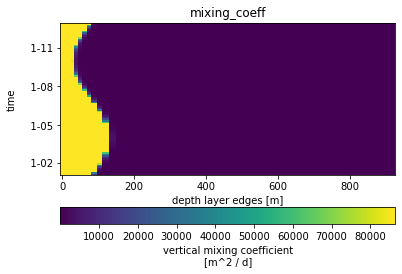

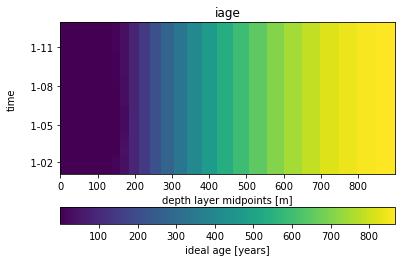

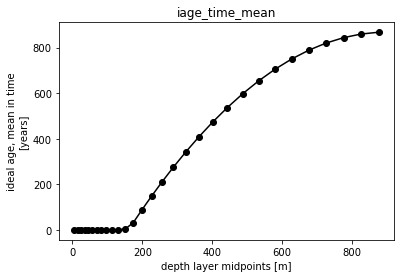

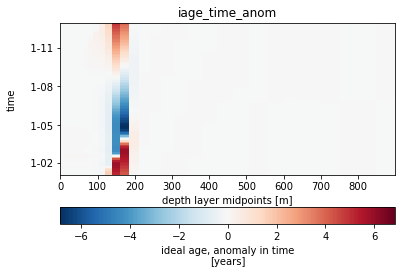

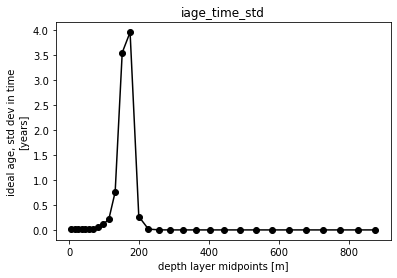

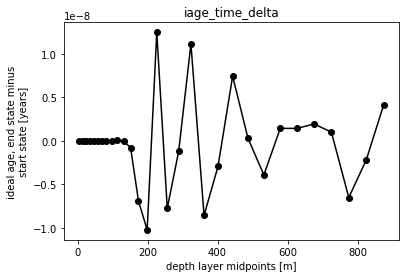

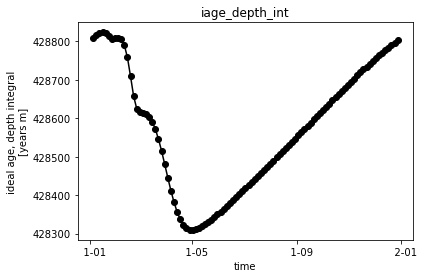

In [13]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

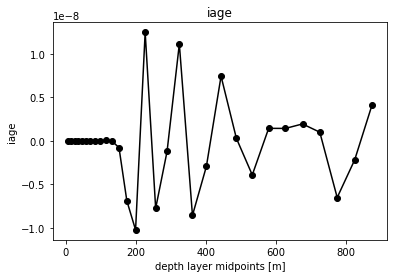

In [14]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)